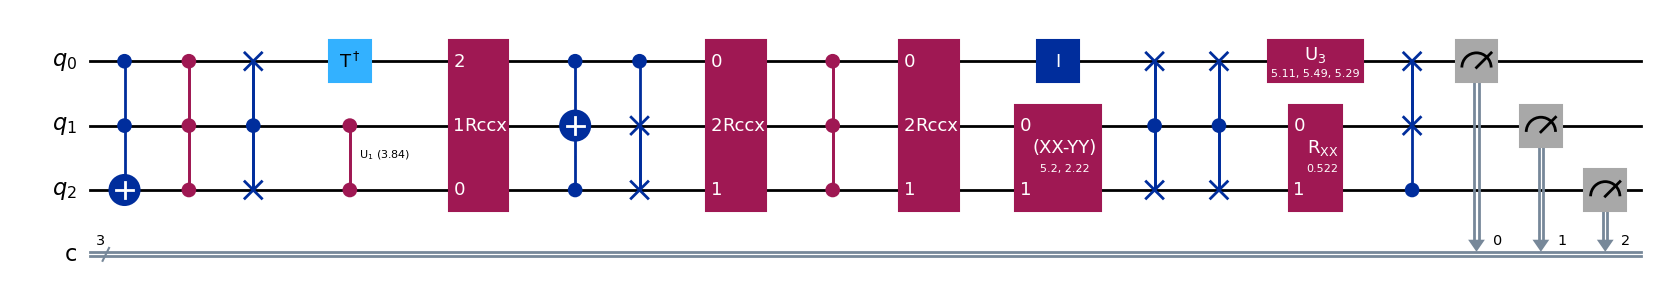

In [19]:
from qiskit.circuit.random import random_circuit
 
number_qubit = 3
depth = 15
circ = random_circuit(number_qubit, depth, measure=True)
circ.draw(output='mpl')

# Save the image
circ.draw(output='mpl', filename='random_circuit.png')

In [7]:
# Circuit convert to OPENQASM
from qiskit.qasm2 import dumps
qasm_str = dumps(circ)

print(qasm_str)

# Circuit convert to Qiskit QuantumCircuit
from qiskit.qasm2 import load
from qiskit import QuantumCircuit
qc = QuantumCircuit.from_qasm_str(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(param0) q1; cx q0,q1; h q1; }
gate ryy(param0) q0,q1 { rx(pi/2) q0; rx(pi/2) q1; cx q0,q1; rz(param0) q1; cx q0,q1; rx(-pi/2) q0; rx(-pi/2) q1; }
qreg q[5];
creg c[5];
cz q[0],q[3];
h q[1];
cu(4.19192563178495,4.308288522276933,1.7303880303858405,1.8291467017561258) q[4],q[2];
rzx(4.905387907105999) q[1],q[0];
sdg q[4];
cry(2.325021876720312) q[3],q[1];
cry(0.9493844582998725) q[0],q[2];
id q[4];
ryy(3.521487614181128) q[1],q[2];
crz(0.7527092029515529) q[3],q[0];
u2(2.5883905918017285,1.8436995344658256) q[2];
s q[3];
crx(0.17923122056121774) q[4],q[1];
h q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];


Probabilities: {'00000': 0.0869140625, '00010': 0.1865234375, '00101': 0.080078125, '00001': 0.1337890625, '00110': 0.0849609375, '00100': 0.169921875, '00011': 0.0419921875, '00111': 0.2158203125}


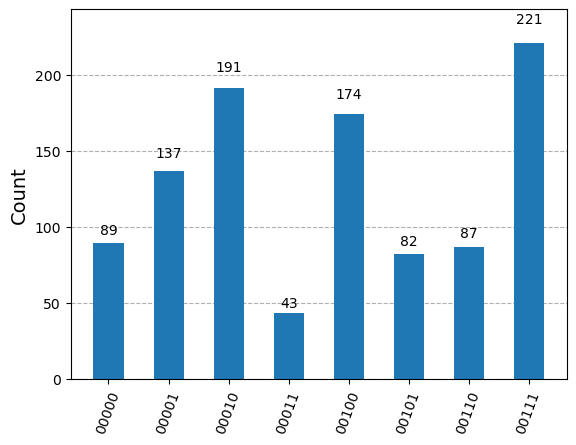

In [5]:
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Use the Aer simulator
simulator = Aer.get_backend('aer_simulator')

# Transpile the circuit for the simulator
compiled_circuit = transpile(circ, simulator)

# Run the circuit on the simulator
result = simulator.run(compiled_circuit).result()

# Get the counts (measurement outcomes)
counts = result.get_counts()

# Calculate probabilities
total_shots = sum(counts.values())
probabilities = {state: count / total_shots for state, count in counts.items()}

print("Probabilities:", probabilities)

# Plot the histogram of the results
plot_histogram(counts)

In [4]:
!pip install matplotlib


In [ ]:
import random
import csv
import os
import uuid
import json
from qiskit.circuit.random import random_circuit
from qiskit.qasm2 import dumps, loads
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# Configuration
NUM_SAMPLES = 10  # Number of entries to generate
MIN_QUBITS = 1
MAX_QUBITS = 10
DEPTH = 15
IMAGE_DIR = 'circuit_images'
CSV_FILENAME = 'quantum_circuits.csv'

# Create output directory if it doesn't exist
os.makedirs(IMAGE_DIR, exist_ok=True)

def generate_circuit_data(num_samples):
    with open(CSV_FILENAME, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['image_path1', 'number_of_qubits', 'openqasm', 'ground_truth'])

        for _ in range(num_samples):
            # Generate random number of qubits
            num_qubits = random.randint(MIN_QUBITS, MAX_QUBITS)
            
            # Create random circuit
            circ = random_circuit(num_qubits, DEPTH, measure=True)
            
            # Generate unique filename
            unique_id = uuid.uuid4().hex
            image_path = os.path.join(IMAGE_DIR, f'circuit_{unique_id}.png')
            
            # Save circuit image
            circ.draw(output='mpl', filename=image_path)
            
            # Convert to OpenQASM
            qasm_str = dumps(circ)
            
            # Simulate circuit
            simulator = Aer.get_backend('aer_simulator')
            compiled = transpile(circ, simulator)
            result = simulator.run(compiled).result()
            counts = result.get_counts()
            
            # Calculate probabilities
            total_shots = sum(counts.values())
            probabilities = {state: count/total_shots for state, count in counts.items()}
            
            # Write to CSV
            writer.writerow([
                image_path,
                num_qubits,
                qasm_str,
                json.dumps(probabilities)
            ])

if __name__ == '__main__':
    generate_circuit_data(NUM_SAMPLES)
    print(f"Generated {NUM_SAMPLES} entries in {CSV_FILENAME}")

In [ ]:
import pennylane as qml

qml.data.load('other', name='mqt-bench')

dev = qml.device('default.qubit')

@qml.qnode(dev)
def circuit(ops):
    for op in ops:
        qml.apply(op)
    return qml.state()

def first_10_ae_benchmark():
    for i in range(2,12):
        circuit(temp_ds.ae[str(i)])

timeit.timeit(first_10_ae_benchmark,number=5) # time the simulation: around 2 seconds
